# Distance and dissimilarity score test

define and test various distance definitions

In [1]:
import numpy as np
import random
import scipy as sp
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score 
from math import exp, sqrt
from scipy.spatial.distance import cdist, pdist, squareform

%matplotlib inline
%load_ext autoreload

In [2]:
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
import grasp_mc
%autoreload 2

In [3]:
input_data = np.loadtxt("candidates_2columns.dat")
input_data.shape

(10000, 2)

In [4]:
grasp_out = np.loadtxt("solution_v_32.txt")
grasp_index = open("solution_i_32_32.txt", "r")
grasp_sol = np.array([int(i) for i in grasp_index.readlines()[3:]])
grasp_out.shape, grasp_sol.shape

((32, 2), (32,))

In [5]:
def myfscore(labels, **kwargs):
    try:
        D = kwargs.get('D')
        Mmax = int(kwargs.get('M'))
    except:
        raise ValueError
    if len(labels) >= Mmax:
        M = Mmax
    else:
        M = len(labels)
    near = np.argsort(D, axis=1)[0][:M+1]
    expfac = np.array([2.**(M-j) for j in range(M)])
    DS = 0.
    for j in range(M):
        for i in labels:
            DS += expfac[j]*D[i,near[j]]
    DS = DS/(len(labels)*M*np.sum(expfac))
    return DS

In [6]:
D = sp.spatial.distance.squareform(sp.spatial.distance.pdist(input_data))
d_i = np.sum(D, axis=1)
dmax_i = np.argsort(d_i)[-32:-1]

In [7]:
l1=[910, 769, 812, 131, 1573, 1892]
l2=[1,2,3,4,5,6]
l3=[910, 769, 812, 131, 1573, 6]

In [8]:
myfscore([23,24], D=D, M=1)

0.2953606528216888

In [9]:
myfscore(l1,D=D,M=6), myfscore(l2,D=D,M=6), myfscore(l3,D=D,M=6)

(0.04820286484296201, 0.03603012449982032, 0.04301791562134862)

In [10]:
Dsort  = np.argsort([D], axis=1)
Dsort[0].shape

(10000, 10000)

In [11]:
sigma = 0.05
DG = np.exp(-(D*D)/(2.*sigma*sigma))
d_g = np.sum(DG, axis=1)
dmax_g = np.argsort(d_g)[:32]

In [12]:
dmin_m = np.argsort(d_g)[:32]

In [13]:
DM = sp.spatial.distance.squareform(sp.spatial.distance.pdist(input_data, metric='mahalanobis'))
d_m = np.sum(DM, axis=1)
dmax_m = np.argsort(d_m)[-32:-1]

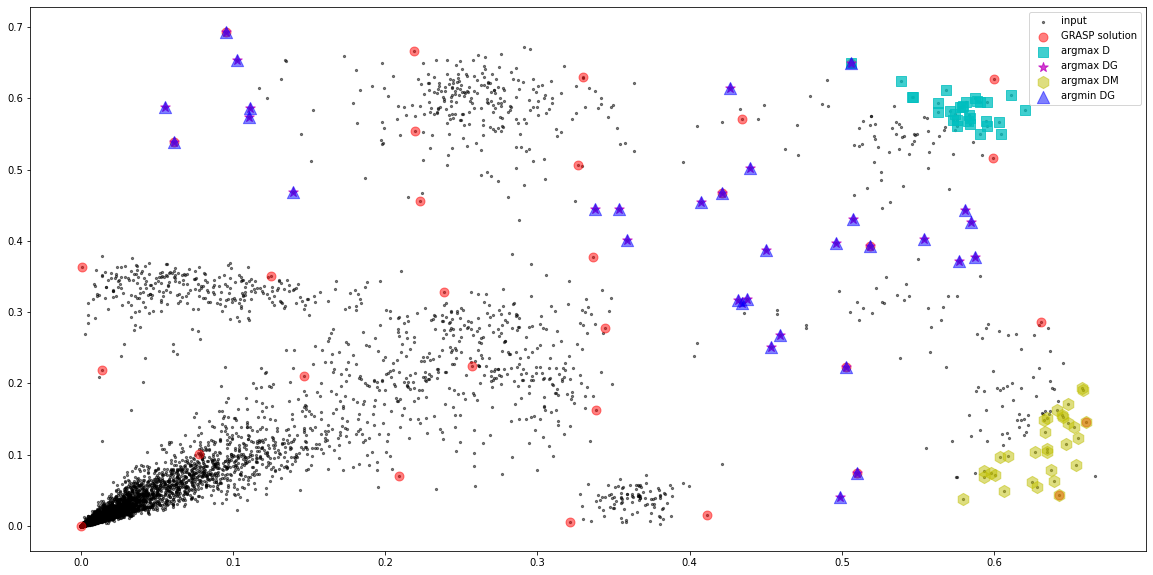

In [14]:
plt.figure(figsize=(20,10))
x = input_data[:,0]
y = input_data[:,1]
plt.scatter(x, y, marker="o", s=5, c='k', label="input", alpha=0.5)
plt.scatter(input_data[grasp_sol,0], input_data[grasp_sol,1], label="GRASP solution", marker='o',\
            c='r', s=80, alpha=0.5)
plt.scatter(x[dmax_i], y[dmax_i], label="argmax D", marker='s',c='c', s=100,alpha=0.75)
plt.scatter(x[dmax_g], y[dmax_g], label="argmax DG", marker='*',c='m', s=100,alpha=0.75)
plt.scatter(x[dmax_m], y[dmax_m], label="argmax DM", marker='h',c='y', s=150,alpha=0.5)
plt.scatter(x[dmin_m], y[dmin_m], label="argmin DG", marker='^',c='b', s=150,alpha=0.5)
plt.legend()